# Enter Student Name & ID

In [1]:
student_id =   400101283 #@param {type:"integer"}
student_name = "Kimia Ramezan" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101283
your name: Kimia Ramezan


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [31]:
def myPCA(X, num_components):
    #
    # Complete
    #
    X_meaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    return X_reduced,eigenvector_subset


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

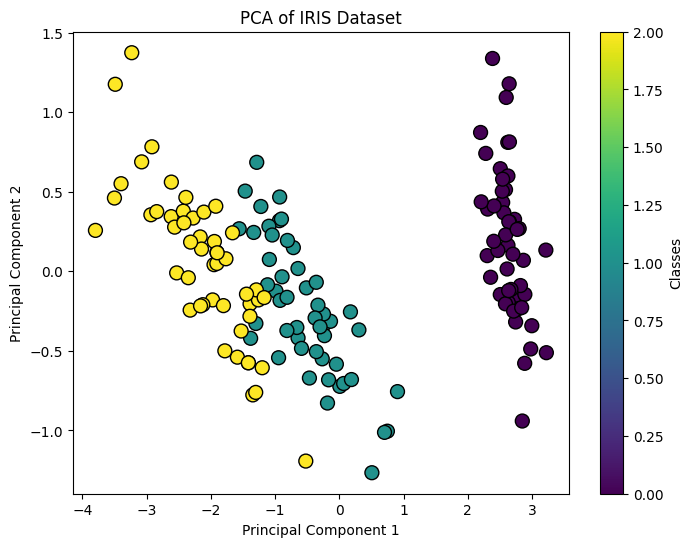

In [34]:
# myPCA on IRIS 

iris = load_iris()
X = iris.data
y = iris.target
X_reduced,eigenvector_subset = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.colorbar(label='Classes')
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Eigenfaces are eigenvectors derived from the covariance matrix of face images, used in face recognition tasks. By applying Principal Component Analysis (PCA) to a dataset of face images, eigenfaces are obtained as the principal components that capture the most variance in the data.

Relationship to PCA:
Dimensionality Reduction: PCA reduces the high-dimensional space of face images to a lower-dimensional space by finding principal components (eigenfaces).
Feature Extraction: Eigenfaces serve as key features representing essential characteristics of faces.
Face Recognition: Faces are projected onto the eigenface space, enabling efficient recognition and differentiation.
Eigenfaces are thus a practical application of PCA in computer vision for face recognition


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [26]:
pip install opencv-python


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import os
import cv2
import numpy as np

dataset_path = 'ORL'

X_train, X_test = [], []
y_train, y_test = [], []

individuals = sorted(os.listdir(dataset_path))
for label, person in enumerate(individuals):
    person_path = os.path.join(dataset_path, person)
    
    if os.path.isdir(person_path):
        images = sorted(os.listdir(person_path))
        
        if len(images) >= 10:
            for img_name in images[:5]:
                img_path = os.path.join(person_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                X_train.append(img.flatten())
                y_train.append(label)

            for img_name in images[5:10]:
                img_path = os.path.join(person_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                X_test.append(img.flatten())
                y_test.append(label)

X_train = np.array(X_train).reshape(len(X_train), -1)
X_test = np.array(X_test).reshape(len(X_test), -1)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (200, 2304)
Testing data shape: (200, 2304)
Training labels shape: (200,)
Testing labels shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [36]:
num_components = 40 
X_train_pca, eigenvector_subset = myPCA(X_train, num_components)

X_test_meaned = X_test - np.mean(X_test, axis=0)
X_test_pca = np.dot(X_test_meaned, eigenvector_subset)

print("PCA-reduced training data shape:", X_train_pca.shape)
print("PCA-reduced testing data shape:", X_test_pca.shape)

PCA-reduced training data shape: (200, 40)
PCA-reduced testing data shape: (200, 40)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [38]:
# Initialize the LDA classifier
lda = LDA()
lda.fit(X_train_pca, y_train)
y_pred = lda.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("LDA classifier accuracy on PCA-transformed data:", accuracy)


LDA classifier accuracy on PCA-transformed data: 0.93


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?

Based on the output, the maximum accuracy of 0.955 is achieved with 96 PCA components. This suggests that using 96 features (PCA components) is sufficient to obtain the highest accuracy in this particular experiment.

However, it's also important to consider the trade-off between the number of features and computational efficiency. While 96 components provide the best accuracy, we may want to balance the number of components with the computational cost, especially if the gain in accuracy is marginal when compared to a lower number of components. For instance, if a slightly lower number of components (e.g., 90 or 80) provides comparable accuracy, it might be more efficient to use those.

so 96 PCA components are sufficient for achieving maximum accuracy in this case, but we consider the trade-off between accuracy and computational cost when choosing the final number of features.



Maximum accuracy is 0.955 with 96 PCA components.


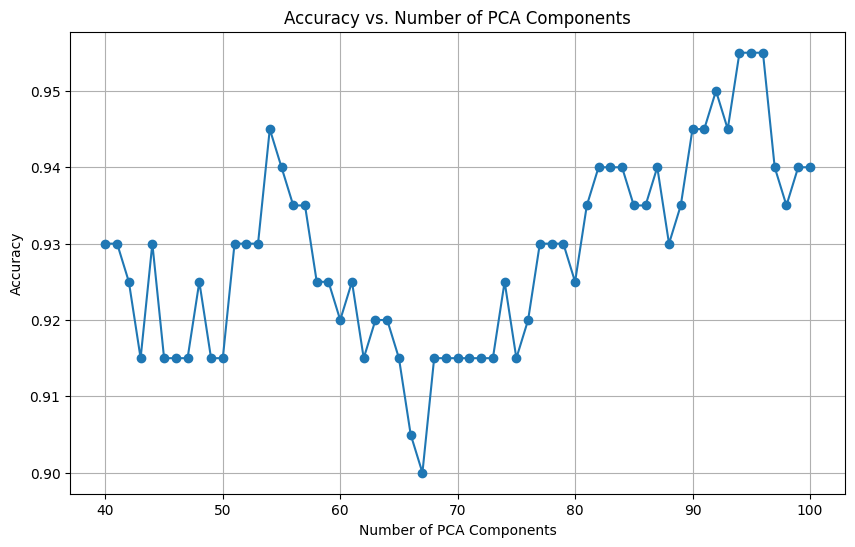

In [43]:
accuracy_results = {}
for num_components in range(100, 39, -1):  
    #print(f"Evaluating PCA with {num_components} components...")
    
    X_train_pca, eigenvector_subset = myPCA(X_train, num_components)
    
    X_test_meaned = X_test - np.mean(X_test, axis=0)
    X_test_pca = np.dot(X_test_meaned, eigenvector_subset)
    
    lda = LDA()
    
    lda.fit(X_train_pca, y_train)
    
    y_pred = lda.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[num_components] = accuracy
    #print(f"Accuracy with {num_components} PCA components: {accuracy}")
    
max_accuracy = max(accuracy_results.values())
optimal_components = max(accuracy_results, key=accuracy_results.get)

print(f"\nMaximum accuracy is {max_accuracy} with {optimal_components} PCA components.")

plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()